In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import os
from google.colab import drive

Using TensorFlow backend.


In [3]:
# Mount google drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
os.chdir('/content/drive/My Drive')

In [5]:
os.getcwd()

'/content/drive/My Drive'

In [6]:
# load the model
model = VGG16()

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 9s 0us/step


In [0]:
# load an image from file 
# resize to (224,224) - required for VGG16
image = load_img('mug.jpg', target_size=(224, 224))

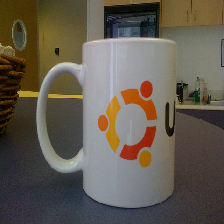

In [8]:
image

In [0]:
# convert the image pixels to a numpy array
image = img_to_array(image)

In [10]:
image

array([[[ 64.,  54.,   3.],
        [ 64.,  57.,   3.],
        [ 78.,  53.,   0.],
        ...,
        [117.,  91.,  64.],
        [111.,  88.,  44.],
        [107.,  81.,  64.]],

       [[ 73.,  49.,   5.],
        [ 66.,  57.,   0.],
        [ 62.,  54.,   8.],
        ...,
        [118.,  90.,  53.],
        [122.,  92.,  56.],
        [ 95.,  64.,  35.]],

       [[ 67.,  56.,   2.],
        [ 71.,  52.,  10.],
        [ 71.,  55.,   0.],
        ...,
        [120.,  90.,  66.],
        [127.,  99.,  62.],
        [104.,  74.,  46.]],

       ...,

       [[ 40.,  47.,  57.],
        [ 48.,  43.,  66.],
        [ 48.,  54.,  52.],
        ...,
        [ 36.,  42.,  32.],
        [ 50.,  47.,  38.],
        [ 50.,  43.,  35.]],

       [[ 45.,  43.,  57.],
        [ 49.,  49.,  57.],
        [ 43.,  46.,  55.],
        ...,
        [ 28.,  48.,  36.],
        [ 48.,  40.,  37.],
        [ 56.,  49.,  43.]],

       [[ 45.,  42.,  59.],
        [ 47.,  48.,  53.],
        [ 57.,  

In [11]:
image.shape # 3 channels - R,G,B of 224 * 224

(224, 224, 3)

In [0]:
# The input tensor for VGG needs to be 4-dimensional: samples, rows, columns, and channels
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [15]:
image.shape

(1, 224, 224, 3)

In [0]:
# preparocess the image for the VGG model
image = preprocess_input(image)

In [12]:
# Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
# predict the probability across all output classes
yhat = model.predict(image)

In [18]:
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

40960/35363 [==================================] - 0s 0us/step


In [19]:
label

('n03063599', 'coffee_mug', 0.783754)

In [20]:
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (78.38%)
